In [1]:
!pip install opencv-python
!pip install deepface
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=7fc94e63a0e9779e263616e96ac3a10d5d95c9946694d66bfe13fbcf0fcb79e7
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [2]:
import cv2
from matplotlib import pyplot as plt
from deepface import DeepFace
import numpy as np


25-07-19 15:21:01 - Directory /root/.deepface has been created
25-07-19 15:21:01 - Directory /root/.deepface/weights has been created


In [7]:
from google.colab import files
uploaded = files.upload()

# Get uploaded file name
image_path = list(uploaded.keys())[0]


Saving angryman.jpg to angryman.jpg


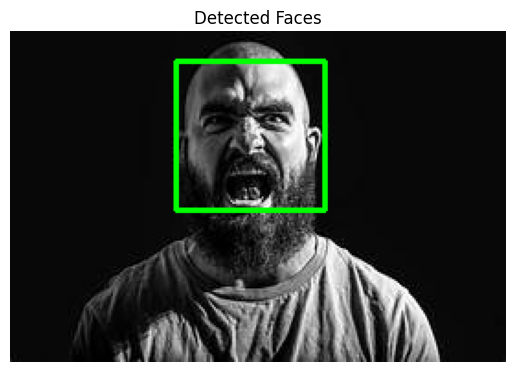

In [8]:
# Load the image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis('off')
plt.show()


In [9]:
# Run face analysis using DeepFace (includes recognition, emotion, age, gender)
result = DeepFace.analyze(img_path=image_path, actions=['age', 'gender', 'emotion'], enforce_detection=False)

# Show the result
print("DeepFace Results:")
for face in result:
    print(f"Age: {face['age']}, Gender: {face['gender']}, Emotion: {face['dominant_emotion']}")


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

DeepFace Results:
Age: 42, Gender: {'Woman': np.float32(7.782692e-05), 'Man': np.float32(99.999916)}, Emotion: angry
